In [1]:
import sympy
from sympy import I, expand_complex
import numpy as np
import matplotlib.pyplot as plt
from sympy import sqrt, S, conjugate, E, re, im, Symbol, solveset, Abs, acos, cos, pi, sin, simplify

# Практическое занятие 10
# Компьютерный практикум по алгебре на Python
## Комплексные числа в sympy
### Задание 1.
Даны комплексные числа
$$
z_1 = 5\sqrt{3} + 5i,\quad z_2 = -3 + 3i,\quad z_3 = - 1 + i,\quad z_4 = i,\quad z_5 = \frac{12}{13} + \frac{5}{13}i,
$$
вычислить (представить в алгебраической форме) с помощью sympy
$$
z_1 \cdot z_2,\quad (z_2 - 5z_3)^6,\quad \sqrt{\frac{z_4}{z_3}},\quad \frac{z_1^2 + z_3}{13z_5 - 2z_2}.
$$

In [2]:
# ДАНО:
z1 = 5 * sympy.sqrt(3) + 5 * I
z2 = -3 + 3 * I
z3 = -1 + I
z4 = I
z5 = sympy.S(12)/13 + sympy.S(5)/13 * I

display(z1, z2, z3, z4, z5)

5*sqrt(3) + 5*I

-3 + 3*I

-1 + I

I

12/13 + 5*I/13

In [3]:
f1 = z1 * z2
f2 = (z2 - 5 * z3)**6
f3 = (z4/z3)**sympy.S.Half
f4 = (z1**2 + z3)/(13*z5 - 2*z2)

List_func = [f1, f2, f3, f4]

for func in List_func:
  display(expand_complex(func))
  print("\n")

-15*sqrt(3) - 15 + I*(-15 + 15*sqrt(3))

512*I

2**(3/4)*sqrt(sqrt(2)/4 + 1/2)/2 - 2**(3/4)*I*sqrt(1/2 - sqrt(2)/4)/2

-2*sqrt(3)/13 + 881/325 + I*(67/325 + 36*sqrt(3)/13)

### Задание  2.
Вычисления Задания 1 проделать для мнимой единицы из python (использовать встроенную функцию complex).

In [4]:
# ДАНО (чистый Python без Sympy):
z1 = complex(5 * np.sqrt(3), 5)
z2 = complex(-3, 3)
z3 = complex(-1, 1)
z4 = complex(0, 1)
z5 = complex(12/13, 5/13)

print(z1, z2, z3, z4, z5, sep = '\n')

(8.660254037844386+5j)
(-3+3j)
(-1+1j)
1j
(0.9230769230769231+0.38461538461538464j)


In [5]:
f1 = z1 * z2
f2 = (z2 - 5 * z3)**6
f3 = (z4/z3)**.5
f4 = (z1**2 + z3)/(13*z5 - 2*z2)

List_func = [f1, f2, f3, f4]

print(*List_func, sep = '\n')

(-40.98076211353316+10.980762113533157j)
(-0+512j)
(0.7768869870150187-0.32179712645279135j)
(2.4442998757586336+5.002602236344583j)


### Задание  3.
Изобразить на координатной плоскости точки, соответствующие корням  $7$-й степени комплексного числа $z = \frac{3}{5} + i\frac{3}{5}$. Подписать точки $Ak$, где $k$  - номер корня.

In [6]:
# ДАНО:
z = sympy.S(3)/5 + sympy.S(3)/5 * I
z

3/5 + 3*I/5

In [7]:
n = 7
List_roots = [sympy.root(z, n, k) for k in range(n)]
display(*List_roots)

(3/5 + 3*I/5)**(1/7)

(-1)**(2/7)*(3/5 + 3*I/5)**(1/7)

(-1)**(4/7)*(3/5 + 3*I/5)**(1/7)

(-1)**(6/7)*(3/5 + 3*I/5)**(1/7)

-(-1)**(1/7)*(3/5 + 3*I/5)**(1/7)

-(-1)**(3/7)*(3/5 + 3*I/5)**(1/7)

-(-1)**(5/7)*(3/5 + 3*I/5)**(1/7)

In [8]:
Display_roots = [sympy.expand_complex(item).simplify() for item in List_roots]
display(*Display_roots)

2**(1/14)*46875**(1/7)*exp(I*pi/28)/5

2**(1/14)*46875**(1/7)*(sin(5*pi/28) + I*cos(5*pi/28))/5

2**(1/14)*46875**(1/7)*(-sin(3*pi/28) + I*cos(3*pi/28))/5

-2**(1/14)*46875**(1/7)*exp(-3*I*pi/28)/5

-2**(1/14)*46875**(1/7)*exp(5*I*pi/28)/5

-2**(1/14)*46875**(1/7)*(sin(pi/28) + I*cos(pi/28))/5

2**(4/7)*46875**(1/7)*(1 - I)/10

(-1.5, 1.5)

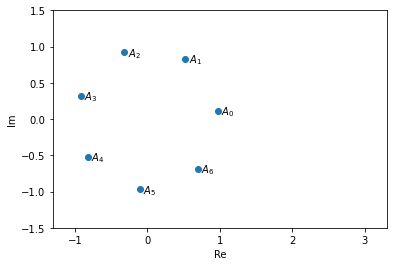

In [9]:
roots_x = [sympy.re(item) for item in List_roots]
roots_y = [sympy.im(item) for item in List_roots]
plt.scatter(roots_x, roots_y)
# при желании можно отобразить формулы,
# добавив  "= {sympy.latex(Display_roots[k])}" в строку №7
for k, x_coord in enumerate(roots_x): 
    plt.annotate(f'$A_{k}$',
            xy=(x_coord, roots_y[k]), 
            xytext=(x_coord + 0.05, roots_y[k] - 0.05)) 
plt.axis('equal')
plt.xlabel("Re")
plt.ylabel("Im")
plt.xlim(-2.5, 4.5)
plt.ylim(-1.5, 1.5)

### Задание  4.
Изобразить на координатной плоскости точки, соответствующие $z_4 = - \sqrt{3} + 3i$ и $\bar{z_4}$, подписать $z_4$ тригонометрической формой, $\bar{z_4}$ - экспоненциальной ($z = r e^{i\varphi}$, $r$ и $\varphi$ такие же, как в тригонометрической форме).

2*sqrt(3)*(-1/2 + sqrt(3)*I/2)

2*sqrt(3)*exp(-2*I*pi/3)

(-5.0, 5.0)

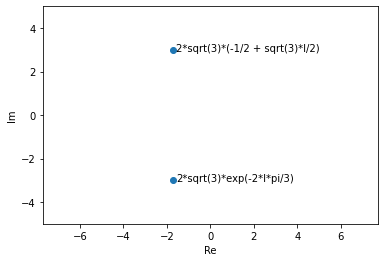

In [10]:
z4 = -sqrt(3) + 3 * I
z4_c = conjugate(z4)

r, phi = sympy.symbols('r phi')
r0 = sympy.functions.Abs(z4)
phi0 = sympy.functions.arg(z4)

z4_trig = r * (sympy.cos(phi) + sympy.sin(phi) * I)
z4_trig = z4_trig.subs({r: r0, phi: phi0})
display(z4_trig)

r1 = sympy.functions.Abs(z4_c)
phi1 = sympy.functions.arg(z4_c)
z4_c_exp = r * E ** (I * phi)
z4_c_exp = z4_c_exp.subs({r: r1, phi: phi1})
display(z4_c_exp)

roots_x = [re(z4), re(z4_c)]
roots_y = [im(z4), im(z4_c)]

plt.scatter(roots_x, roots_y)
plt.annotate(z4_trig, xy = (roots_x[0], roots_y[0]), xytext=(roots_x[0] + 0.15, roots_y[0] - 0.05))
plt.annotate(z4_c_exp, xy = (roots_x[1], roots_y[1]), xytext=(roots_x[1] + 0.15, roots_y[1] - 0.05))
plt.axis('equal')
plt.xlabel("Re")
plt.ylabel("Im")
plt.xlim(-3, 3)
plt.ylim(-5, 5)

#### Задание  5.
Изобразить корни 4 степени числа $5e^{\frac{i\pi}{8}}$, в полярной системе координат, подписи к точкам - аргументы (углы) сответствующих комплексных чисел. 

Число вводить в тригонометрической форме, для получения корней комплексного числа $z = r(\cos(\varphi) + i\sin(\varphi))$ использовать формулу 
$\sqrt[n]{z} = \sqrt[n]{r}(\cos(\varphi_k) + i \sin(\varphi_k))$, 
$\varphi_k = \frac{\varphi + 2\pi k}{n}$, $k = 0, ..., n - 1$. 

Вывести алгебраическую форму полученных корней на экран и сравнить с результатом, полученным с помощью sympy.root (с использованием sympy.expand_complex для упрощения выражения). Аналитическое представление оказывается разным.

Для каждого корня найти разность модуля разности корней, полученных двумя способами (т.е. нужно для каждой пары одинаковых корней, полученных двумя способами находить разность корней, вычислять модуль sympy.Abs этой разности и вычислить приближенное значение с помощью evalf()).

0

5**(1/4)*cos(pi/32) + 5**(1/4)*I*sin(pi/32)

1.49534878122122*exp(I*atan(sqrt(2 - sqrt(2))/sqrt(sqrt(2) + 2))/4)

0.e-28 + 1.47146608264736e-8*I

1

-5**(1/4)*sin(pi/32) + 5**(1/4)*I*cos(pi/32)

-1.49534878122122*sin(atan(sqrt(2 - sqrt(2))/sqrt(sqrt(2) + 2))/4) + 1.49534878122122*I*cos(atan(sqrt(2 - sqrt(2))/sqrt(sqrt(2) + 2))/4)

1.47146608264736e-8*I

2

-5**(1/4)*cos(pi/32) - 5**(1/4)*I*sin(pi/32)

-1.49534878122122*exp(I*atan(sqrt(2 - sqrt(2))/sqrt(sqrt(2) + 2))/4)

0.e-28 + 1.47146608264736e-8*I

3

5**(1/4)*sin(pi/32) - 5**(1/4)*I*cos(pi/32)

1.49534878122122*sin(atan(sqrt(2 - sqrt(2))/sqrt(sqrt(2) + 2))/4) - 1.49534878122122*I*cos(atan(sqrt(2 - sqrt(2))/sqrt(sqrt(2) + 2))/4)

1.47146608264736e-8*I

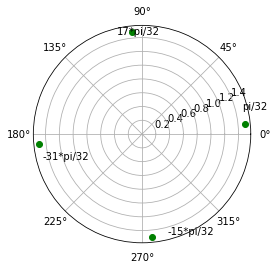

In [11]:
n = 4
z5 = 5 * sympy.exp(I * sympy.pi / 8)
roots = [sympy.root(z5, n, k) for k in range(n)]

r_list = [sympy.functions.Abs(root) for root in roots]
arg_list = [sympy.functions.arg(root).simplify() for root in roots]

r0 = sympy.functions.Abs(z5)
phi0 = sympy.functions.arg(z5)

plt.polar(arg_list, r_list, 'go')
for k, phi_k in enumerate(arg_list): 
    plt.annotate(str(phi_k),
                 xy=(phi_k, r_list[k]), 
                 xytext=(phi_k + 0.15, r_list[k]))
    
for i in range(n):
    display(i)
    x1 = sympy.expand_complex(roots[i])
    x2 = simplify(r0 ** (1 / n) * (cos ((phi0 + 2 * pi * i) / n) + I * sin ((phi0 + 2 * pi * i) / n)))
    display(x1, x2)
    display((sympy.Abs(x1 - x2)).evalf())
    print()

### Индивидуальное задание.
Решить уравнение.
Для получения корней использовать sympy.roots.
Корни уравнения вывести на экран в алгебраической, тригонометрической и экспоненциальной форме.

$(−8 − 7i)x^2 + (48 + 42i)x − 1188 + 486i = 0$

In [12]:
# сделал не всё
x = Symbol('x')
eq = (-8 - 7 * I) * x ** 2 + (48 + 42 * I) * x - 1188 + 486 * I

roots = list(solveset(eq))
display(*roots)

-3 - 9*I

9 + 9*I

Хорасанджян Левон, вариант №157